# Time Series Wind Roses

When dealing with Air Quality Time Series, it is important to assess how distributions are affected by Wind Direction.

The Weather Toolbox provides a Wind object to ease such analysis.

## Introduction


### Imports

We import required packages:

In [1]:
import numpy as np
import pandas as pd
from odapi.connectors import Irceline
from odapi.toolbox import Wind

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [3]:
data = pd.read_pickle("brussels_2014.pickle").droplevel([1,2,3], axis=1)
client = Irceline()

## Roses and Boxplots

We will perform our analysis on the following series:

In [4]:
skeys = ['NO/41R001 (µg/m³)', 'PM-2.5/41N043 (µg/m³)', 'CO2/41R002 (ppm)',
          'O3/41R012 (µg/m³)', 'T/41R001 (°C)', 'WS/41R001 (m/s)']

skeys = [
    "BC/41R001 (µg/m³)",
    "CO/41R001 (mg/m³)",
    "NO/41R001 (µg/m³)",
    "NO2/41R001 (µg/m³)",
    "O3/41R001 (µg/m³)",
    "PM-10.0/41R001 (µg/m³)",
    "PM-2.5/41R001 (µg/m³)",
    "SO2/41R001 (µg/m³)",
    "T/41R001 (°C)",
    "WS/41R001 (m/s)"
]

In [5]:
SO2 = data.filter(regex="SO2").columns

In [6]:
q = (data.index >= "2014-09-19") & (data.index <= "2014-09-26")
q = data.index

In [7]:
data.loc[q]

seriekey,BC/41N043 (µg/m³),BC/41R001 (µg/m³),BC/41R002 (µg/m³),BC/41R012 (µg/m³),CO/41B004 (mg/m³),CO/41B006 (mg/m³),CO/41B008 (mg/m³),CO/41N043 (mg/m³),CO/41R001 (mg/m³),CO/41R002 (mg/m³),...,SO2/41R001 (µg/m³),SO2/41R002 (µg/m³),SO2/41R012 (µg/m³),T/41B011 (°C),T/41R001 (°C),T/41R012 (°C),WD/41R001 (°G),WD/41R012 (°G),WS/41R001 (m/s),WS/41R012 (m/s)
start,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00+01:00,NaN,0.815,1.650,0.645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00+01:00,NaN,0.960,1.495,0.595,NaN,0.190,0.260,0.465,0.250,0.220,...,2.0,4.0,2.5,6.60,7.15,6.70,211.0,210.0,4.005,4.905
2014-01-01 02:00:00+01:00,NaN,0.635,1.315,0.460,NaN,NaN,0.215,0.660,0.215,0.195,...,2.0,4.0,2.0,6.80,7.35,6.90,224.0,218.0,5.260,5.895
2014-01-01 03:00:00+01:00,NaN,0.500,1.930,0.365,NaN,0.160,0.260,0.580,0.205,0.190,...,2.0,4.0,2.0,6.60,7.30,6.65,213.0,204.0,4.390,4.610
2014-01-01 04:00:00+01:00,NaN,0.465,1.025,0.400,NaN,0.135,0.190,0.275,0.200,0.200,...,2.0,3.0,NaN,6.05,6.90,6.00,200.0,192.0,4.355,4.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00+01:00,10.455,5.250,3.755,4.150,0.455,NaN,0.495,0.470,NaN,0.450,...,4.0,6.5,4.5,3.30,3.85,1.05,212.0,208.0,2.560,1.900
2014-12-31 20:00:00+01:00,8.400,4.410,3.715,3.740,0.470,NaN,0.475,0.500,0.605,0.515,...,4.0,7.0,4.5,2.70,3.20,0.85,216.0,207.0,2.655,1.980
2014-12-31 21:00:00+01:00,7.720,3.860,4.310,4.605,0.515,NaN,0.500,0.505,0.540,NaN,...,3.0,6.5,4.0,2.40,2.80,0.25,214.0,217.0,2.630,1.985


In [8]:
scales = client.scales()
scales

{'BC': array([ 0, 10]),
 'CO2': array([350, 550]),
 'CO': array([0, 2]),
 'NO2': array([  0, 200]),
 'NO': array([  0, 200]),
 'O3': array([  0, 200]),
 'PM-10.0': array([  0, 150]),
 'PM-2.5': array([  0, 100]),
 'RH': array([  0, 100]),
 'SO2': array([ 0, 15]),
 'T': array([-15,  40]),
 'TOL': array([ 0, 25]),
 'p': array([ 950, 1150]),
 'WD': array([  0, 360]),
 'WS': array([ 0, 15]),
 'BZN': array([ 0, 10]),
 'EBZ': array([0, 5]),
 'MPX': array([0, 5]),
 'OXL': array([0, 5])}

In [9]:
scales["CO"][1] = 1
scales["BC"][1] = 5
scales["NO"][1] = 100
scales["PM-2.5"][1] = 40
scales["PM-10.0"][1] = 60
scales["CO2"][1] = 450
scales["O3"][1] = 100
scales["T"][1] = 30
scales["WS"][1] = 6

**Note:** There is a difference between Goniometric and Trigonometric systems. By defaults, Weather methods expect to get Goniometric angles (common meteorological reference) instead of Trigonometric angles.

BC/41R001 (µg/m³)
CO/41R001 (mg/m³)
NO/41R001 (µg/m³)
NO2/41R001 (µg/m³)
O3/41R001 (µg/m³)
PM-10.0/41R001 (µg/m³)
PM-2.5/41R001 (µg/m³)


/home/jlandercy/.local/lib/python3.6/site-packages/odapi-0.1.3-py3.6.egg/odapi/toolbox/weather.py:246: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axe = plt.subplots(figsize=figsize, subplot_kw={'projection': 'polar'})


SO2/41R001 (µg/m³)
T/41R001 (°C)
WS/41R001 (m/s)


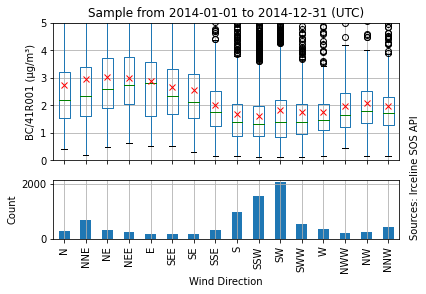

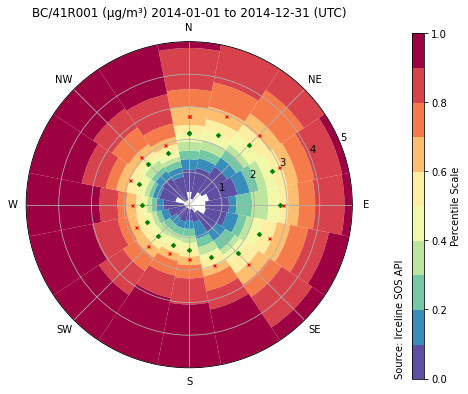

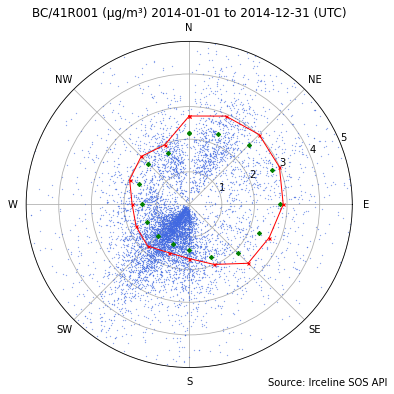

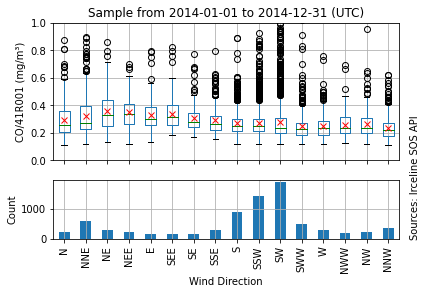

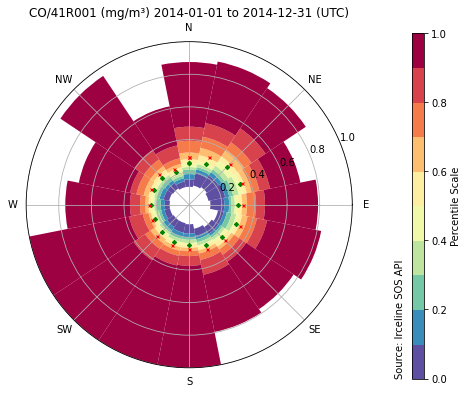

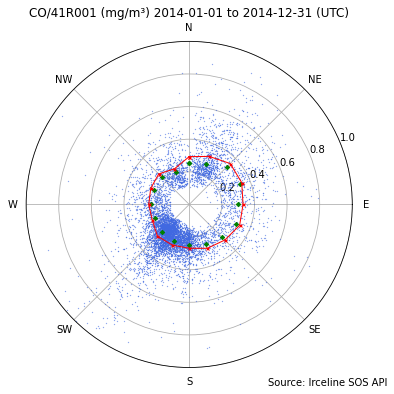

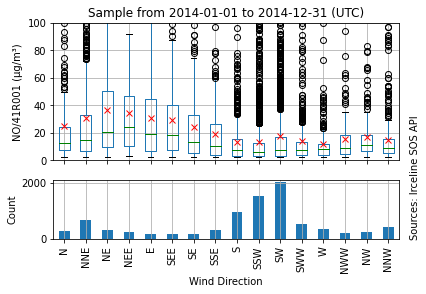

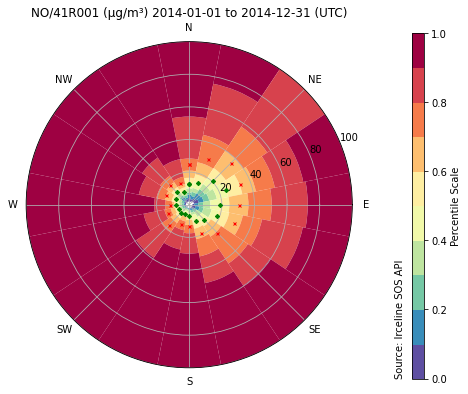

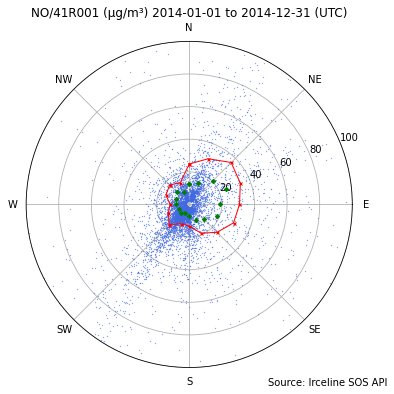

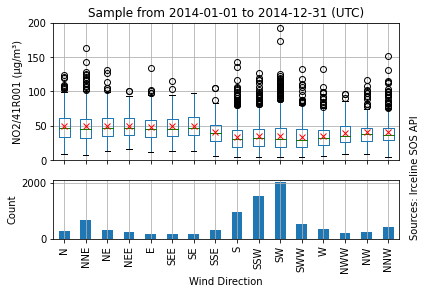

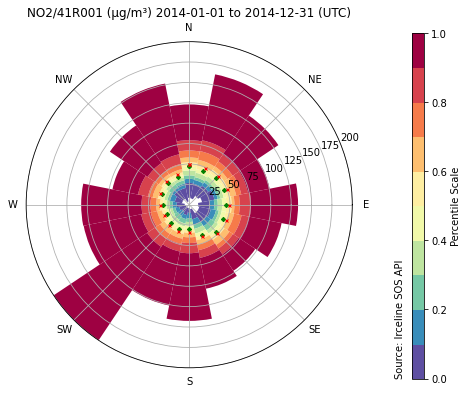

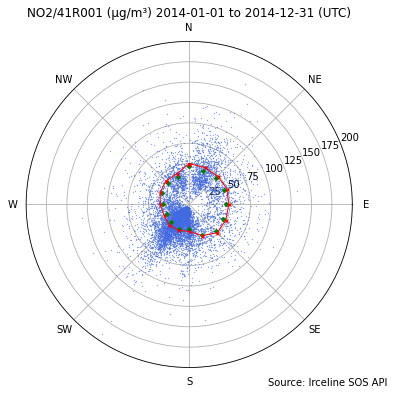

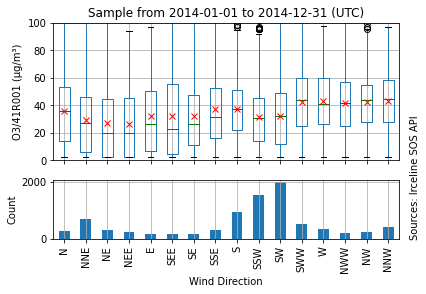

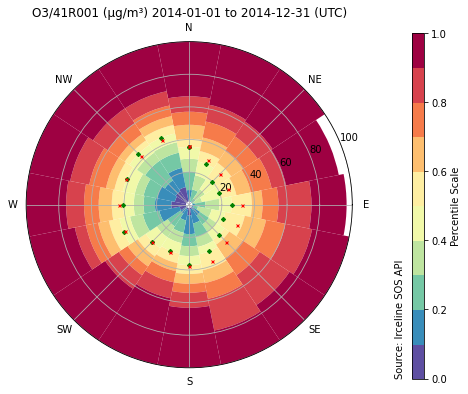

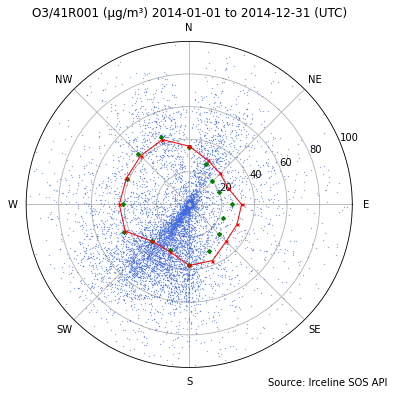

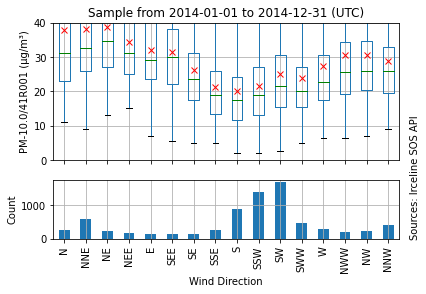

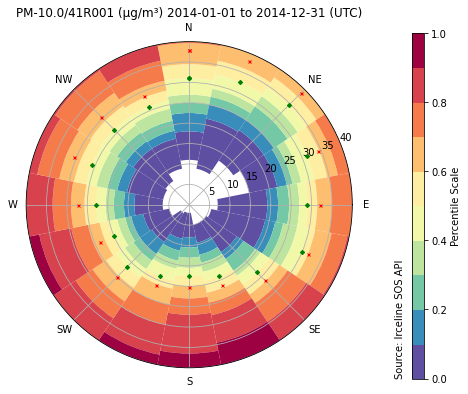

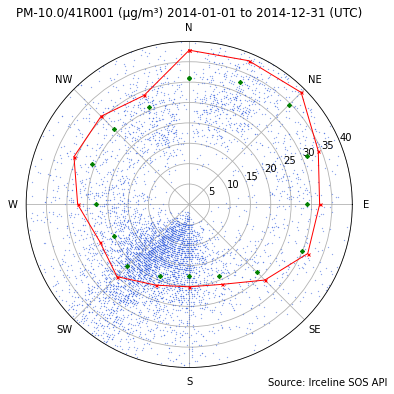

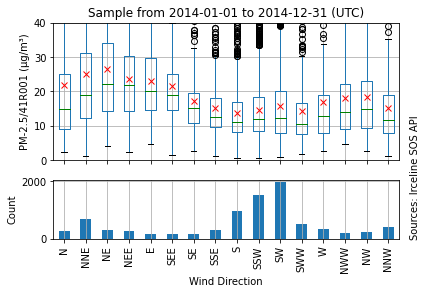

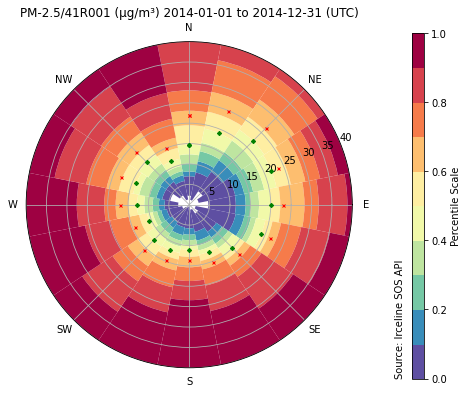

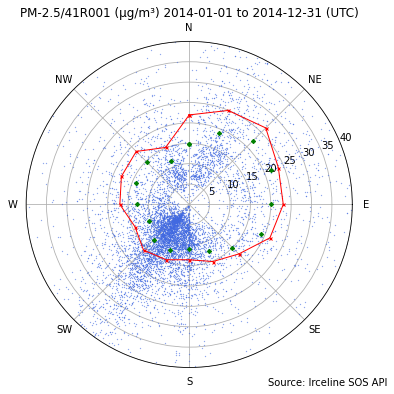

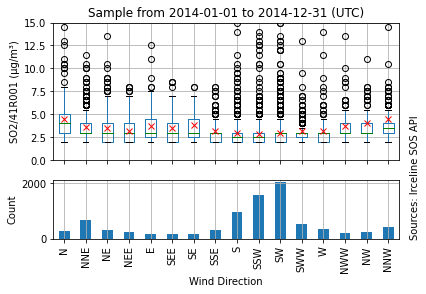

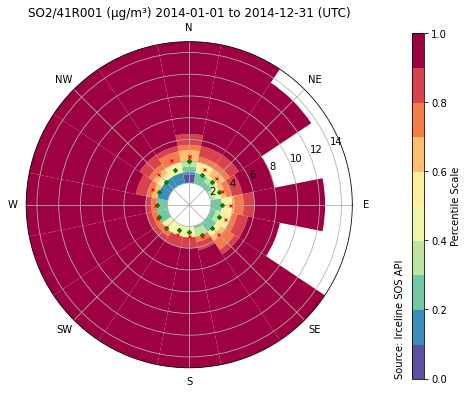

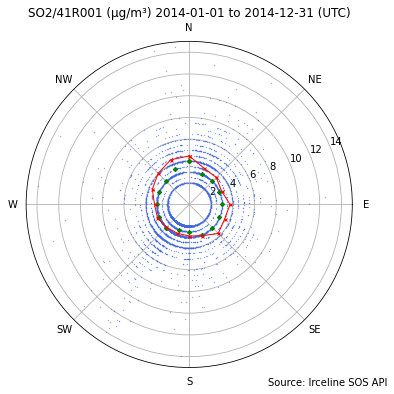

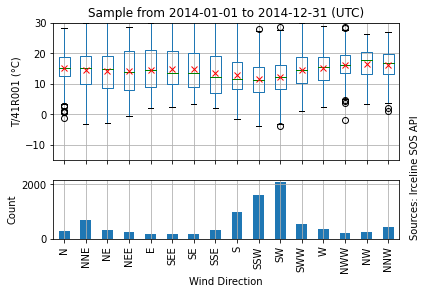

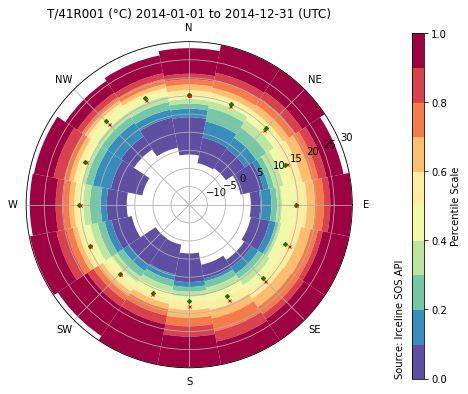

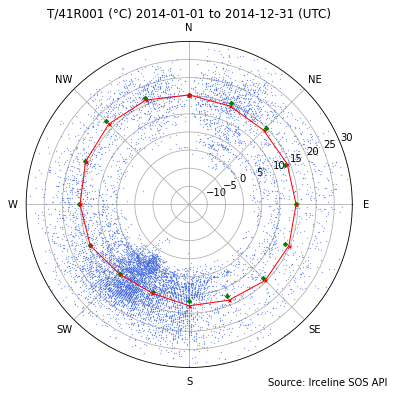

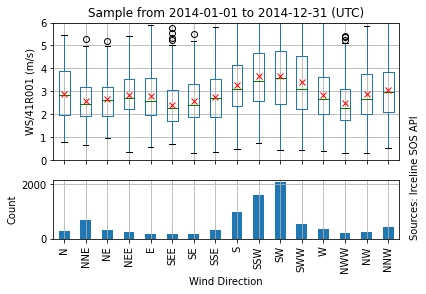

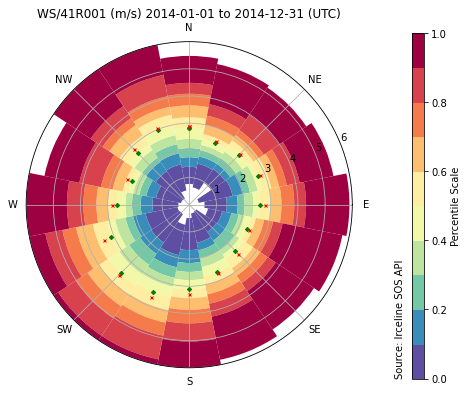

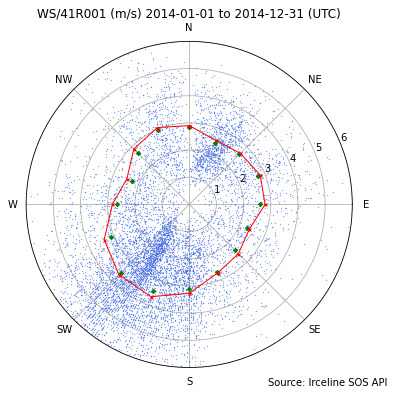

In [10]:
for k in skeys:
    print(k)
    axe1 = Wind.boxplot(data.loc[q], k, theta='WD/41R001 (°G)')
    axe1[0].set_ylim(scales[k.split('/')[0]])
    axe1[0].set_title("Sample from {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe1[0].figure.text(0.925, 0.155, "Sources: Irceline SOS API", rotation=90)
    axe2 = Wind.rose(data.loc[q], k, theta='WD/41R001 (°G)')
    axe2.set_ylim(scales[k.split('/')[0]])
    axe2.set_title(k + " {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe2.figure.text(0.87, 0.105, "Source: Irceline SOS API", rotation=90)
    axe3 = Wind.rose(data.loc[q], k, theta='WD/41R001 (°G)', quantiles=False, points=True, mean_linewidth=1.0)
    axe3.set_ylim(scales[k.split('/')[0]])
    axe3.set_title(k + " {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe3.figure.text(0.65, 0.085, "Source: Irceline SOS API", rotation=0)
    #break

In [9]:
from scipy import stats

In [10]:
k = "WS/41R001 (m/s)"

In [41]:
law = stats.exponweib(*stats.exponweib.fit(data[k].dropna()))

In [42]:
v = np.linspace(0, 15, 200)

In [43]:
kde = stats.gaussian_kde(data[k].dropna())

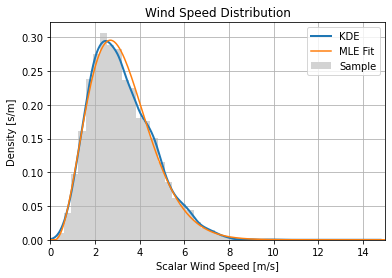

In [44]:
k = "WS/41R001 (m/s)"
axe = data[k].plot(kind="hist", density=1, color="lightgray", bins=30, label="Sample")
data[k].plot(kind="kde", linewidth=2, ax=axe, label="KDE")
axe.plot(v, law.pdf(v), label="MLE Fit")
#axe.plot(v, kde.pdf(v), label="KDE PDF")
axe.set_title("Wind Speed Distribution")
axe.set_xlabel("Scalar Wind Speed [m/s]")
axe.set_ylabel("Density [s/m]")
axe.set_xlim([0, 15])
axe.legend()
axe.grid()

In [45]:
x = data[k].dropna().values

In [46]:
stats.ks_1samp(x, law.cdf)

KstestResult(statistic=0.01462857306988602, pvalue=0.04695241290505803)

In [47]:
stats.ks_2samp(x, kde.pdf(np.linspace(0, 15, 20)))

KstestResult(statistic=0.9998856227839414, pvalue=1.2212453270876722e-15)

In [48]:
stats.ks_2samp(x, x)

KstestResult(statistic=0.0, pvalue=1.0)

In [49]:
c, b = np.histogram(x, 20)
ct = np.diff(law.cdf(b))*np.sum(c)
c2t = stats.chisquare(c, ct, ddof=2)

In [50]:
c2t

Power_divergenceResult(statistic=58.57313019214152, pvalue=1.8038102715389746e-06)